compute the MLE, i.e. maximize log-likelihood function

In [2]:
using Pkg
Pkg.activate("C:/Users/lisah/Documents/Repos/ma-code")

  Activating project at `C:\Users\lisah\Documents\Repos\ma-code`


In [3]:
include("c:/Users/lisah/Documents/Repos/ma-code/src/src.jl")
using .Src

In [51]:
#function compute_ll(x, hprm::Hyperprm, true_val::DataFrame; t_fixed::Bool=false, t_end::Float64=50.0, t_step::Float64=1.0)

a_true = 0.1
n0_true = 0.4
noise = 0.0

prm = Src.Hyperprm(0.95, n0_true, a_true, 0.45, 1000, noise)

Main.Src.Hyperprm(0.95, 0.4, 0.1, 0.45, 1000, 0.0)

In [52]:
# observed data needed for ll computation (only need in this script to test)
obs = Src.sol_klausmeier(prm; t_fixed=true, t_end=500.0)
obs = Src.randomize_data(obs, noise);

In [53]:
result = optimize(x -> -Src.compute_ll(x, prm, obs), zeros(2), BFGS())

 * Status: success

 * Candidate solution
    Final objective value:     9.159958e-02

 * Found with
    Algorithm:     BFGS

 * Convergence measures
    |x - x'|               = 1.17e-10 ≰ 0.0e+00
    |x - x'|/|x'|          = 2.55e-10 ≰ 0.0e+00
    |f(x) - f(x')|         = 6.52e-16 ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = 7.12e-15 ≰ 0.0e+00
    |g(x)|                 = 2.77e-09 ≤ 1.0e-08

 * Work counters
    Seconds run:   1  (vs limit Inf)
    Iterations:    9
    f(x) calls:    20
    ∇f(x) calls:   20


In [54]:
a_est = Optim.minimizer(result)[1]


0.10062366995155075

In [55]:
n0_est = Optim.minimizer(result)[2]

0.45874206205909185

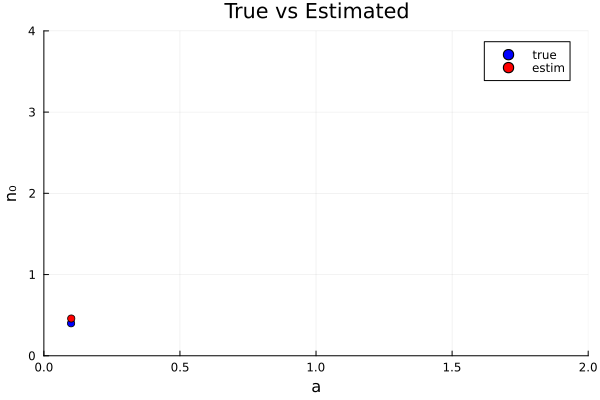

In [56]:
using Plots
scatter(
    [a_true], [n0_true], 
    label = "true", 
    color = :blue,
    xlabel = "a", ylabel = "n₀",
    xlims = (0, 2), ylims = (0, 4),
    legend = :topright,
    title = "True vs Estimated"
)

scatter!(
    [a_est], [n0_est], 
    label = "estim", 
    color = :red
)